In [ ]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

In [ ]:


from google.colab import files 

uploaded = files.upload()

Saving vgsales1.csv to vgsales1.csv


In [ ]:

import io 
 
df = pd.read_csv(io.BytesIO(uploaded['vgsales1.csv']))
print(df.head())

   Rank                      Name Platform  ...  JP_Sales Other_Sales Global_Sales
0     1                Wii Sports      Wii  ...      3.77        8.46        82.74
1     2         Super Mario Bros.      NES  ...      6.81        0.77        40.24
2     3            Mario Kart Wii      Wii  ...      3.79        3.31        35.82
3     4         Wii Sports Resort      Wii  ...      3.28        2.96        33.00
4     5  Pokemon Red/Pokemon Blue       GB  ...     10.22        1.00        31.37

[5 rows x 11 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1178
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          1177 non-null   int64  
 1   Name          1177 non-null   object 
 2   Platform      1177 non-null   object 
 3   Year          1177 non-null   int64  
 4   Genre         1177 non-null   object 
 5   Publisher     1177 non-null   object 
 6   NA_Sales      1177 non-null   float64
 7   EU_Sales      1177 non-null   float64
 8   JP_Sales      1177 non-null   float64
 9   Other_Sales   1177 non-null   float64
 10  Global_Sales  1177 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 150.3+ KB


In [ ]:
df.shape

(1179, 11)

In [ ]:
df.ndim

2

In [ ]:
df.size

12969

In [ ]:
df.style.set_caption('Video Game Sales')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.000000,Sports,Nintendo,41.490000,29.020000,3.770000,8.460000,82.740000
1,2,Super Mario Bros.,NES,1985.000000,Platform,Nintendo,29.080000,3.580000,6.810000,0.770000,40.240000
2,3,Mario Kart Wii,Wii,2008.000000,Racing,Nintendo,15.850000,12.880000,3.790000,3.310000,35.820000
3,4,Wii Sports Resort,Wii,2009.000000,Sports,Nintendo,15.750000,11.010000,3.280000,2.960000,33.000000
4,5,Pokemon Red/Pokemon Blue,GB,1996.000000,Role-Playing,Nintendo,11.270000,8.890000,10.220000,1.000000,31.370000
5,6,Tetris,GB,1989.000000,Puzzle,Nintendo,23.200000,2.260000,4.220000,0.580000,30.260000
6,7,New Super Mario Bros.,DS,2006.000000,Platform,Nintendo,11.380000,9.230000,6.500000,2.900000,30.010000
7,8,Wii Play,Wii,2006.000000,Misc,Nintendo,14.030000,9.200000,2.930000,2.850000,29.020000
8,9,New Super Mario Bros. Wii,Wii,2009.000000,Platform,Nintendo,14.590000,7.060000,4.700000,2.260000,28.620000
9,10,Duck Hunt,NES,1984.000000,Shooter,Nintendo,26.930000,0.630000,0.280000,0.470000,28.310000


In [ ]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year            12
Genre            1
Publisher        1
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
df['Year'].fillna(method='pad', inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df.Year=df.Year.astype(int) 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,590.877655,2004.864061,1.895922,1.142056,0.490272,0.362617,3.890816
std,341.004197,7.176602,2.454193,1.526176,0.975466,0.602256,4.536313
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,1.580000
25%,296.000000,2001.000000,0.880000,0.440000,0.000000,0.110000,1.930000
50%,591.000000,2006.000000,1.360000,0.790000,0.060000,0.220000,2.590000
75%,886.000000,2010.000000,2.070000,1.310000,0.540000,0.400000,4.030000
max,1180.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


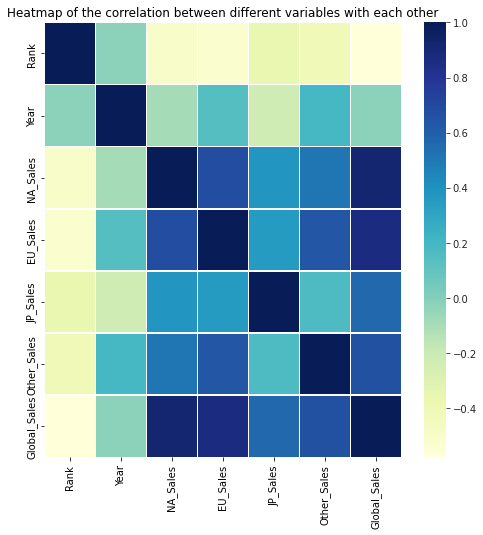

In [ ]:
corr=df.corr() 
fig, ax = plt.subplots(figsize=(8, 8))
with sb.axes_style("white"):
    ax = sb.heatmap(corr, linewidth=0.5,  cmap="YlGnBu")
    ax.set_title("Heatmap of the correlation between different variables with each other")

Text(0.5, 1.0, 'Number of Games Released Per Platform')

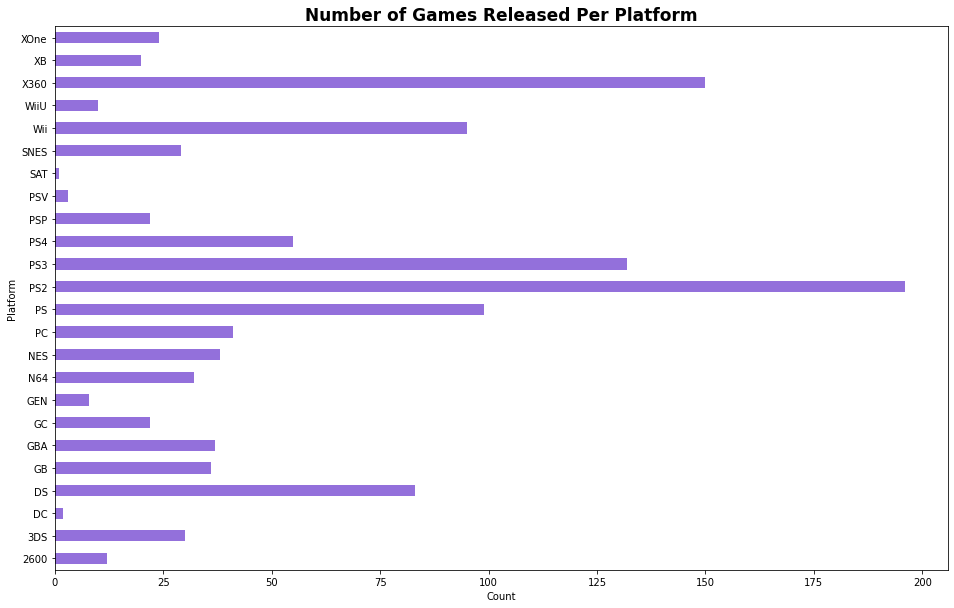

In [ ]:

df.groupby('Platform')['Name'].count().plot(kind='barh',color="mediumpurple",figsize=(16,10))

plt.xlabel('Count')
plt.title('Number of Games Released Per Platform',weight="bold",size=17)

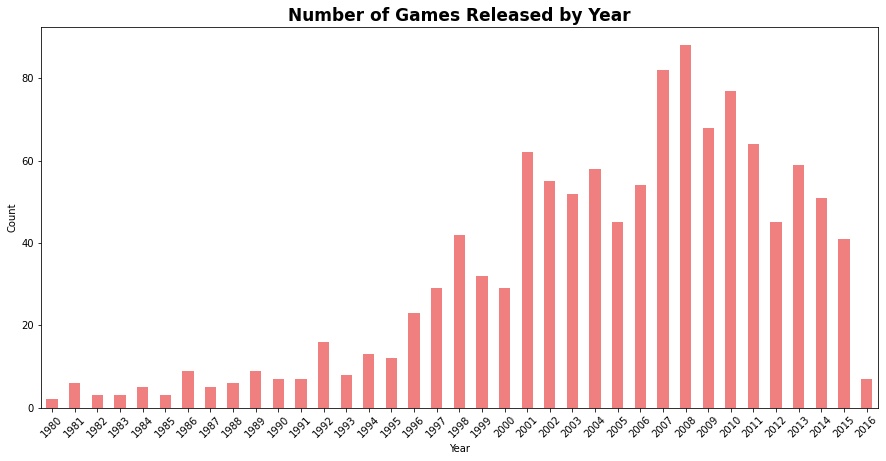

In [ ]:

 
a=df.groupby("Year")["Name"].count()
a.plot(kind="bar", y="name",color="lightcoral", figsize=(15,7))
plt.title("Number of Games Released by Year",weight="bold",size=17)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

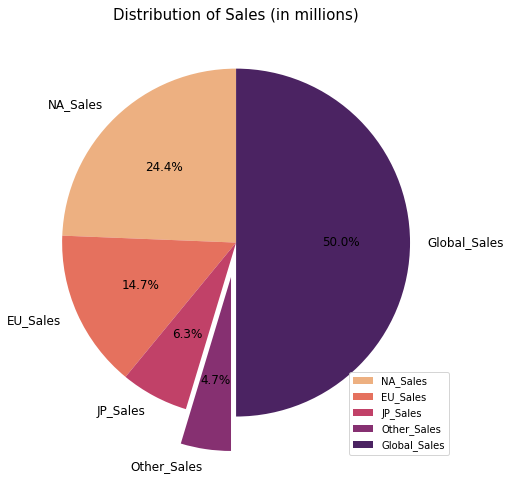

In [ ]:
region_sales =df.sum().reset_index()
r=region_sales.tail()
r.columns = ['Region','Sales']
r
exp1=[0,0,0,0.2,0]
r.plot.pie(y='Sales',autopct="%1.1f%%",figsize=(12,8),
                  fontsize=12,cmap="flare",startangle=90,
                   explode=exp1,labels=r['Region'])
plt.title("Distribution of Sales (in millions)",fontsize=15)
plt.ylabel("")
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


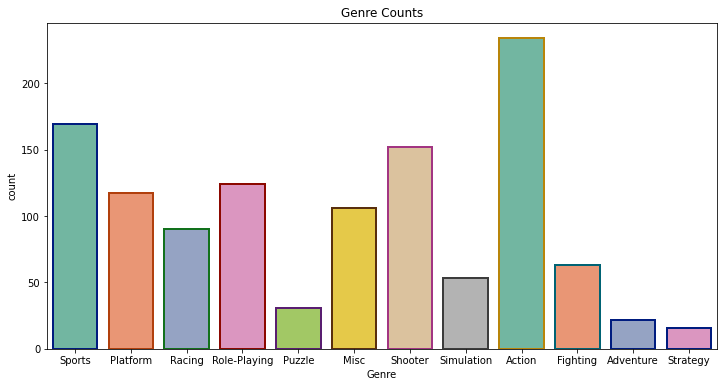

In [ ]:
plt.figure(figsize=(12,6))
sb.countplot(df["Genre"],palette="Set2",edgecolor=sb.color_palette("dark", 11),linewidth=2)
plt.title("Genre Counts")
plt.show()

In [ ]:

#We look at the popular genres in each console
genre_NA = df_sorted.groupby('Genre').NA_Sales.sum()
genre_NA_sorted = genre_NA.sort_values(ascending = False)
genre_EU = df_sorted.groupby('Genre').EU_Sales.sum()
genre_EU_sorted =genre_EU.sort_values(ascending = False)
genre_JP = df_sorted.groupby('Genre').JP_Sales.sum()
genre_JP_sorted =genre_JP.sort_values(ascending = False)
# Name_console_top_30 = Name_console[:30]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.tight_layout(pad=5.0)
# ax.pie(genre_NA_sorted, autopct='%.2f', labels=genre_NA_sorted.index)
ax1.barh(genre_NA_sorted.index, genre_NA_sorted)
ax2.barh(genre_EU_sorted.index, genre_EU_sorted)
ax3.barh(genre_JP_sorted.index, genre_JP_sorted)
# ax.pie(genre_EU_sorted, autopct='%.2f', labels=genre_EU_sorted.index)
ax1.set_title('Top genres chosen by gamers in North America')
ax2.set_title('Top genres chosen by gamers in EU')
ax3.set_title('Top genres chosen by gamers in Japan')
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Genres')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Genres')
ax3.set_xlabel('Sales')
ax3.set_ylabel('Genres')

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, ' Platforms')

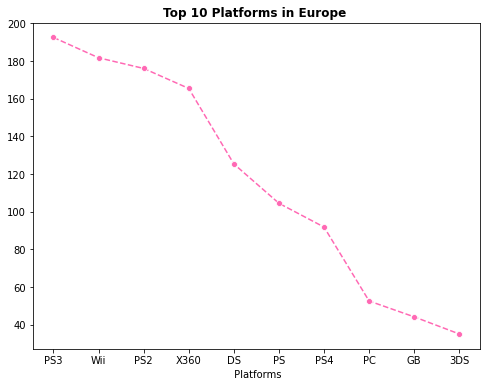

In [ ]:

#top Platforms in Europe
plt.figure(figsize= (8,6))
a=df.groupby("Platform").EU_Sales.sum().sort_values(ascending= False).head(10)
ax=sb.lineplot(a.index,a.values,color='hotpink',linestyle='--',marker="o")
plt.title("Top 10 Platforms in Europe ",weight="bold")
plt.xlabel(" Platforms")

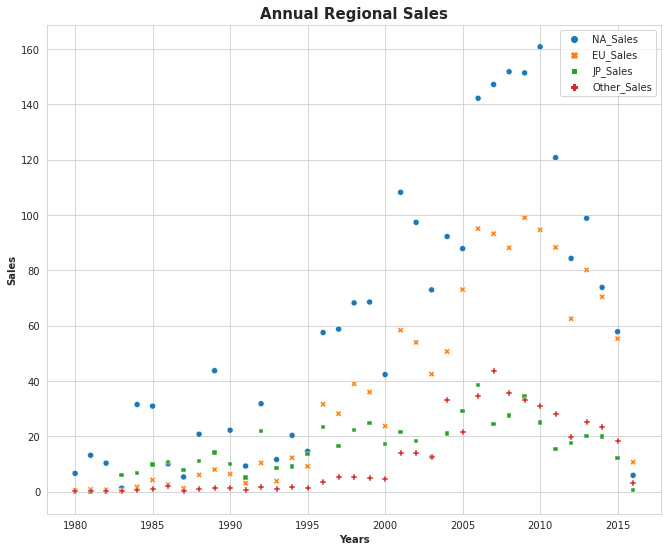

In [ ]:

plt.figure(figsize=(11,9)) 
AnnualSalesMarket = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() 
sb.scatterplot(data=AnnualSalesMarket)
plt.ylabel('Sales',weight="bold",size=10)
plt.xlabel('Years',weight="bold",size=10) 
plt.title('Annual Regional Sales', weight="bold",size=15)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Games')

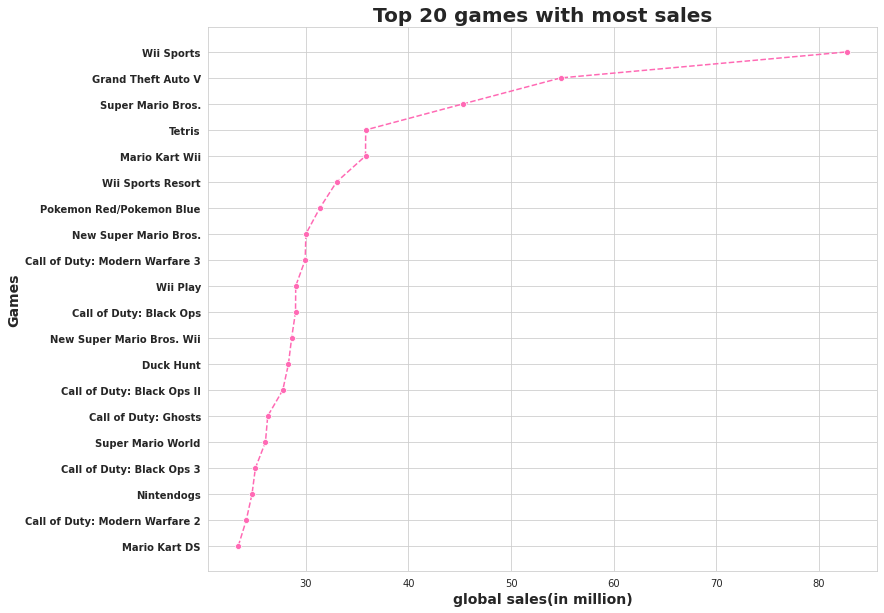

In [ ]:

x= df.groupby('Name').Global_Sales.sum().sort_values(ascending= False).head(20)
plt.figure(figsize= (12,10))
sb.set_style('whitegrid')
ax= sb.lineplot(x.values,x.index,marker='o',linestyle='--', color='hotpink')
plt.yticks(weight='bold', size=10) 
plt.title("Top 20 games with most sales",weight="bold",size=20) 
ax.set_xlabel("global sales(in million)",weight="bold",size=14)
ax.set_ylabel("Games",weight="bold",size=14)

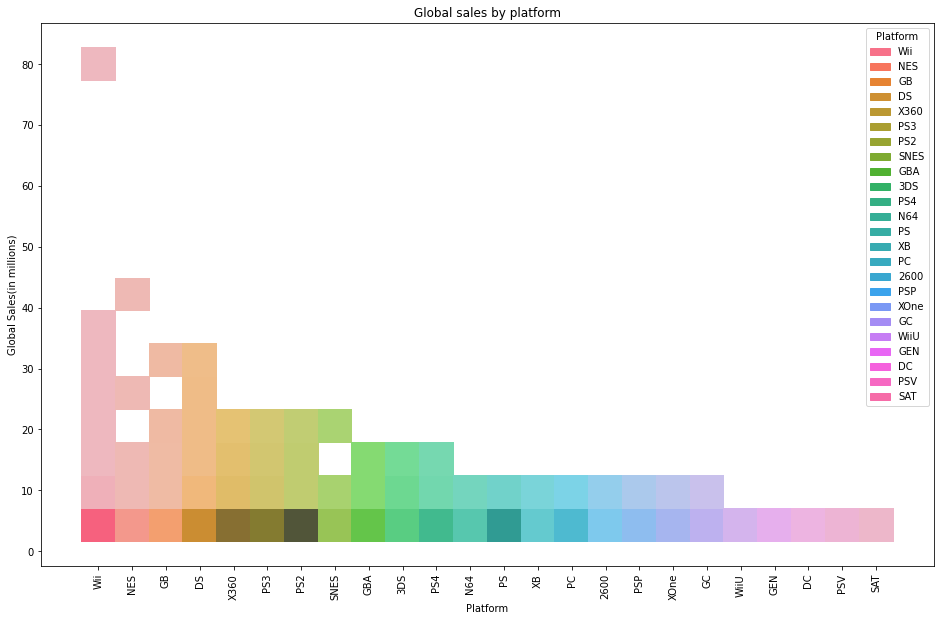

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sb.histplot(x="Platform",y="Global_Sales",hue="Platform",bins=15,data=df)
plt.ylabel('Global Sales(in millions)')
plt.title("Global sales by platform")
plt.show()

ConversionError: ignored

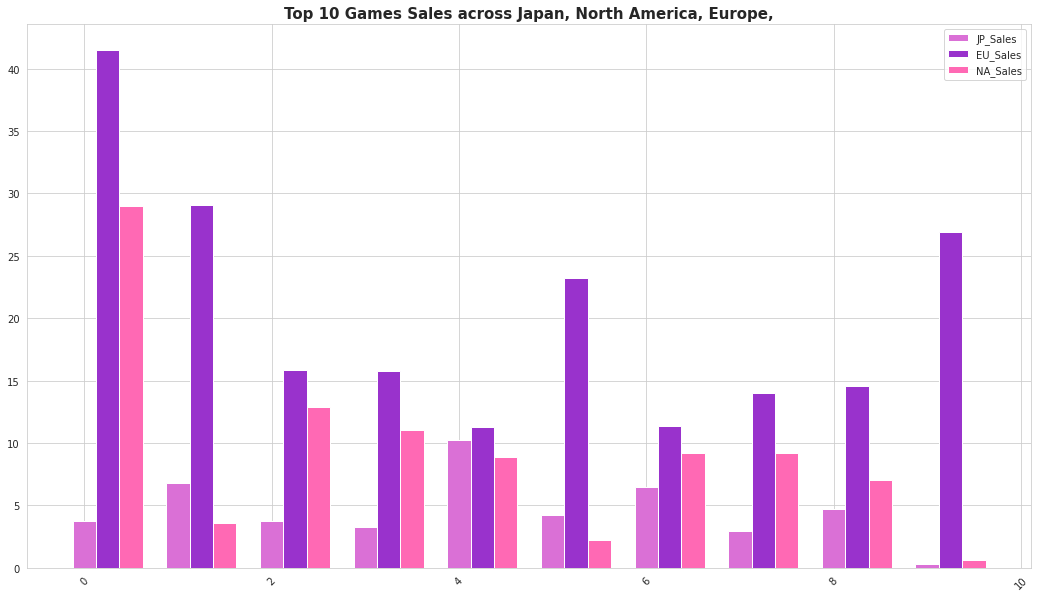

In [ ]:
plt.figure(figsize=(18, 10)) 

y4=df['Name'].head(10) 
ind=np.arange(len(y4)) 
width=0.25

y1=df['JP_Sales'].head(10)
plt.bar(ind,y1,width,color='orchid')

y3=df['NA_Sales'].head(10)
plt.bar(ind+width,y3,width,color='darkorchid')

y2=df['EU_Sales'].head(10)
plt.bar(ind+width*2,y2,width,color='hotpink') 

plt.xticks(rotation=45)
plt.legend(["JP_Sales","EU_Sales","NA_Sales"]) 
plt.title('Top 10 Games Sales across Japan, North America, Europe,',weight="bold",size=15)
plt.xticks(y4,weight="bold") 
plt.xlabel('Games',weight="bold",size=15) 
plt.ylabel('Sales(in millions',weight="bold",size=15)

No handles with labels found to put in legend.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

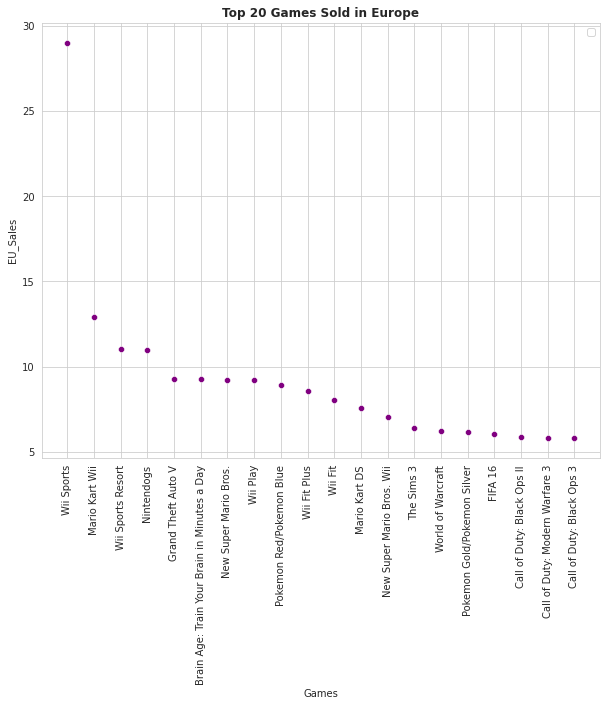

In [ ]:
df2 = df.sort_values('EU_Sales',ascending=False).head(20)

plt.figure(figsize = (10,8))
sb.scatterplot(data =df2, x = 'Name', y = 'EU_Sales',color="purple")
plt.legend()
plt.title('Top 20 Games Sold in Europe',weight="bold")
plt.xlabel('Games')
plt.xticks(rotation =90)